# 1.词向量运算

In [1]:
import numpy as np
import w2v_utils

Using TensorFlow backend.


In [2]:
words, word_to_vec_map = w2v_utils.read_glove_vecs('data/glove.6B.50d.txt')

print(word_to_vec_map['hello'])


[-0.38497   0.80092   0.064106 -0.28355  -0.026759 -0.34532  -0.64253
 -0.11729  -0.33257   0.55243  -0.087813  0.9035    0.47102   0.56657
  0.6985   -0.35229  -0.86542   0.90573   0.03576  -0.071705 -0.12327
  0.54923   0.47005   0.35572   1.2611   -0.67581  -0.94983   0.68666
  0.3871   -1.3492    0.63512   0.46416  -0.48814   0.83827  -0.9246
 -0.33722   0.53741  -1.0616   -0.081403 -0.67111   0.30923  -0.3923
 -0.55002  -0.68827   0.58049  -0.11626   0.013139 -0.57654   0.048833
  0.67204 ]


## 1.1 余弦相似度

In [11]:
def cosine_similarity(u, v):
    """
    u与v的余弦相似度反映了u与v的相似程度
    
    参数：
        u -- 维度为(n,)的词向量
        v -- 维度为(n,)的词向量
        
    返回：
        cosine_similarity -- u和v之间的余弦相似度。
    """
    dot = np.dot(u, v)
    
    norm_u = np.sqrt(np.sum(np.power(u, 2)))
    norm_v = np.sqrt(np.sum(np.power(v, 2)))
    
    cosine_similarity = np.divide(dot, norm_u * norm_v)
    
    return cosine_similarity

In [23]:
father = word_to_vec_map["father"]
mother = word_to_vec_map["mother"]
ball = word_to_vec_map["ball"]
crocodile = word_to_vec_map["crocodile"]
france = word_to_vec_map["france"]
italy = word_to_vec_map["italy"]
paris = word_to_vec_map["paris"]
rome = word_to_vec_map["rome"]

print("cosine_similarity(father, mother) = ", cosine_similarity(father, mother))
print("cosine_similarity(ball, crocodile) = ",cosine_similarity(ball, crocodile))
print("cosine_similarity(france - paris, rome - italy) = ",cosine_similarity(france - paris, rome - italy))


cosine_similarity(father, mother) =  0.8909038442893615
cosine_similarity(ball, crocodile) =  0.27439246261379424
cosine_similarity(france - paris, rome - italy) =  -0.6751479308174202


## 1.2 词类类比

In [27]:
def complete_analogy(word_a, word_b, word_c, word_to_vec_map):
    """
    解决“A与B相比就类似于C与____相比一样”之类的问题
    
    参数：
        word_a -- 一个字符串类型的词
        word_b -- 一个字符串类型的词
        word_c -- 一个字符串类型的词
        word_to_vec_map -- 字典类型，单词到GloVe向量的映射
        
    返回：
        best_word -- 满足(v_b - v_a) 最接近 (v_best_word - v_c) 的词
    """
    # 把单词转换为小写
    word_a, word_b, word_c = word_a.lower(), word_b.lower(), word_c.lower()
    
    e_a = word_to_vec_map[word_a]
    e_b = word_to_vec_map[word_b]
    e_c = word_to_vec_map[word_c]
    
    words = word_to_vec_map.keys()
    max_similarity = -100
    best_word = None
    
    for word in words:
        if word in [word_a,word_b,word_c]:
            continue
            
        cos_similarity = cosine_similarity(e_b-e_a, word_to_vec_map[word]-e_c)
        if cos_similarity > max_similarity:
            max_similarity = cos_similarity
            best_word = word
    
    return best_word

In [28]:
triads_to_try = [('italy', 'italian', 'spain'), ('india', 'delhi', 'japan'), ('man', 'woman', 'boy'), ('small', 'smaller', 'large')]
for triad in triads_to_try:
    print ('{} -> {} <====> {} -> {}'.format( *triad, complete_analogy(*triad,word_to_vec_map)))


italy -> italian <====> spain -> spanish
india -> delhi <====> japan -> tokyo
man -> woman <====> boy -> girl
small -> smaller <====> large -> larger


## 1.3 去除词向量的偏见

### 消除与性别词无关词汇偏差

In [40]:
g = word_to_vec_map['woman'] - word_to_vec_map['man']
print(g)

word_list = ['lipstick', 'guns', 'science', 'arts', 'literature', 'warrior','doctor', 'tree', 'receptionist', 
             'technology',  'fashion', 'teacher', 'engineer', 'pilot', 'computer', 'singer']
for w in word_list:
    print (w, cosine_similarity(word_to_vec_map[w], g))

[-0.087144    0.2182     -0.40986    -0.03922    -0.1032      0.94165
 -0.06042     0.32988     0.46144    -0.35962     0.31102    -0.86824
  0.96006     0.01073     0.24337     0.08193    -1.02722    -0.21122
  0.695044   -0.00222     0.29106     0.5053     -0.099454    0.40445
  0.30181     0.1355     -0.0606     -0.07131    -0.19245    -0.06115
 -0.3204      0.07165    -0.13337    -0.25068714 -0.14293    -0.224957
 -0.149       0.048882    0.12191    -0.27362    -0.165476   -0.20426
  0.54376    -0.271425   -0.10245    -0.32108     0.2516     -0.33455
 -0.04371     0.01258   ]
lipstick 0.2769191625638266
guns -0.1888485567898898
science -0.060829065409296994
arts 0.008189312385880328
literature 0.06472504433459927
warrior -0.20920164641125288
doctor 0.11895289410935041
tree -0.07089399175478091
receptionist 0.33077941750593737
technology -0.13193732447554296
fashion 0.03563894625772699
teacher 0.17920923431825664
engineer -0.08039280494524072
pilot 0.0010764498991916787
computer -0.

In [38]:
def neutralize(word, g, word_to_vec_map):
    """
    通过将“word”投影到与偏置轴正交的空间上，消除了“word”的偏差。
    该函数确保“word”在性别的子空间中的值为0
    
    参数：
        word -- 待消除偏差的字符串
        g -- 维度为(50,)，对应于偏置轴（如性别）
        word_to_vec_map -- 字典类型，单词到GloVe向量的映射
        
    返回：
        e_debiased -- 消除了偏差的向量。
    """
    
    # 根据word选择对应的词向量
    e = word_to_vec_map[word]
    
    # 根据公式2计算e_biascomponent
    e_biascomponent = np.divide(np.dot(e, g), np.square(np.linalg.norm(g))) * g
    
    # 根据公式3计算e_debiased
    e_debiased = e - e_biascomponent
    
    return e_debiased


In [39]:
e = "receptionist"
print("去偏差前{0}与g的余弦相似度为：{1}".format(e, cosine_similarity(word_to_vec_map["receptionist"], g)))

e_debiased = neutralize("receptionist", g, word_to_vec_map)
print("去偏差后{0}与g的余弦相似度为：{1}".format(e, cosine_similarity(e_debiased, g)))


去偏差前receptionist与g的余弦相似度为：0.33077941750593737
去偏差后receptionist与g的余弦相似度为：1.1682064664487028e-17


### 性别词的均衡算法（略）

In [42]:
a = np.array([2,2])
b = np.array([1,0])
e_bias = np.divide(np.dot(a, b), np.square(np.linalg.norm(b))) * b
print(e_bias)
print(a - e_bias)

[2. 0.]
[0. 2.]


# 2. Emoij表情生成器

In [1]:
import numpy as np
import emo_utils
import emoji
import matplotlib.pyplot as plt

%matplotlib inline

## 2.1 基准模型 - V1

In [2]:
X_train, Y_train = emo_utils.read_csv('data/train_emoji.csv')
X_test, Y_test = emo_utils.read_csv('data/test.csv')

maxLen = len(max(X_train, key=len).split())


In [3]:
index  = 3
print(X_train[index], emo_utils.label_to_emoji(Y_train[index]))

Miss you so much ❤️


In [7]:
# 转换成独热编码
Y_oh_train = emo_utils.convert_to_one_hot(Y_train, C=5)
Y_oh_test = emo_utils.convert_to_one_hot(Y_test, C=5)

# 读取glove词嵌入
word_to_index, index_to_word, word_to_vec_map = emo_utils.read_glove_vecs('data/glove.6B.50d.txt')


In [8]:
word = "cucumber"
index = 113317
print("单词{0}对应的索引是：{1}".format(word, word_to_index[word]))
print("索引{0}对应的单词是：{1}".format(index, index_to_word[index]))


单词cucumber对应的索引是：113317
索引113317对应的单词是：cucumber


In [15]:
def sentence_to_avg(sentence, word_to_vec_map):
    """
    将句子转换为单词列表，提取其GloVe向量，然后将其平均。
    
    参数：
        sentence -- 字符串类型，从X中获取的样本。
        word_to_vec_map -- 字典类型，单词映射到50维的向量的字典
        
    返回：
        avg -- 对句子的均值编码，维度为(50,)
    """
    words = sentence.lower().split()
    vec = np.zeros((50,))
    
    for word in words:
        vec += word_to_vec_map[word]
    
    avg = np.divide(vec, len(words))
    
    return avg

## 模型

In [28]:
def model(X, Y, word_to_vec_map, learning_rate=0.01, num_iterations=400):
    """
    在numpy中训练词向量模型。
    
    参数：
        X -- 输入的字符串类型的数据，维度为(m, 1)。
        Y -- 对应的标签，0-7的数组，维度为(m, 1)。
        word_to_vec_map -- 字典类型的单词到50维词向量的映射。
        learning_rate -- 学习率.
        num_iterations -- 迭代次数。
        
    返回：
        pred -- 预测的向量，维度为(m, 1)。
        W -- 权重参数，维度为(n_y, n_h)。
        b -- 偏置参数，维度为(n_y,)
    """
    np.random.seed(1)
    
    m = X.shape[0]
    n_y = 5
    n_h = 50
    
    # 使用Xavier初始化参数
    W = np.random.randn(n_y, n_h) / np.sqrt(n_h)
    b = np.zeros((n_y,))
    
    Y_oh = emo_utils.convert_to_one_hot(Y, C=n_y)
    
    for t in range(num_iterations):
        for i in range(m):
            avg = sentence_to_avg(X[i], word_to_vec_map)
            
            z = np.dot(W, avg) + b
            a = emo_utils.softmax(z)
            
            # 计算损失
            cost = - np.sum(Y_oh[i] * np.log(a))
            
            # 计算梯度
            dz = a - Y_oh[i]
            dW = np.dot(dz.reshape(n_y,1), avg.reshape(1, n_h))
            db = dz
            
            # 更新参数
            W = W - learning_rate * dW
            b = b - learning_rate * db
            
        if t % 100 == 0:
            print("{t}轮损失：{cost}".format(t=t, cost=cost))
            pred = emo_utils.predict(X, Y, W, b, word_to_vec_map)
            
    return pred, W, b

In [26]:
print(X_train.shape)
print(Y_train.shape)
print(np.eye(5)[Y_train.reshape(-1)].shape)
print(X_train[0])
print(type(X_train))
Y = np.asarray([5,0,0,5, 4, 4, 4, 6, 6, 4, 1, 1, 5, 6, 6, 3, 6, 3, 4, 4])
print(Y.shape)

X = np.asarray(['I am going to the bar tonight', 'I love you', 'miss you my dear',
 'Lets go party and drinks','Congrats on the new job','Congratulations',
 'I am so happy for you', 'Why are you feeling bad', 'What is wrong with you',
 'You totally deserve this prize', 'Let us go play football',
 'Are you down for football this afternoon', 'Work hard play harder',
 'It is suprising how people can be dumb sometimes',
 'I am very disappointed','It is the best day in my life',
 'I think I will end up alone','My life is so boring','Good job',
 'Great so awesome'])


(132,)
(132,)
(132, 5)
never talk to me again
<class 'numpy.ndarray'>
(20,)


## 训练 & 测试

In [29]:
pred, W, b = model(X_train, Y_train, word_to_vec_map)

0轮损失：1.9520498812810072
Accuracy: 0.3484848484848485
100轮损失：0.07971818726014807
Accuracy: 0.9318181818181818
200轮损失：0.04456369243681402
Accuracy: 0.9545454545454546
300轮损失：0.03432267378786059
Accuracy: 0.9696969696969697


In [30]:
print("=====训练集====")
pred_train = emo_utils.predict(X_train, Y_train, W, b, word_to_vec_map)
print("=====测试集====")
pred_test = emo_utils.predict(X_test, Y_test, W, b, word_to_vec_map)


=====训练集====
Accuracy: 0.9772727272727273
=====测试集====
Accuracy: 0.8571428571428571


In [31]:
X_my_sentences = np.array(["i adore you", "i love you", "funny lol", "lets play with a ball", "food is ready", "you are not happy"])
Y_my_labels = np.array([[0], [0], [2], [1], [4],[3]])

pred = emo_utils.predict(X_my_sentences, Y_my_labels , W, b, word_to_vec_map)
emo_utils.print_predictions(X_my_sentences, pred)


Accuracy: 0.8333333333333334

i adore you ❤️
i love you ❤️
funny lol 😄
lets play with a ball ⚾
food is ready 🍴
you are not happy ❤️


 	 ❤️ 	 ⚾ 	 😄 	 😞 	 🍴
Predicted  0.0  1.0  2.0  3.0  4.0  All
Actual                                 
0            6    0    0    1    0    7
1            0    8    0    0    0    8
2            2    0   16    0    0   18
3            1    1    2   12    0   16
4            0    0    1    0    6    7
All          9    9   19   13    6   56


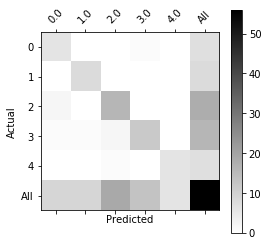

In [32]:
print(" \t {0} \t {1} \t {2} \t {3} \t {4}".format(emo_utils.label_to_emoji(0), emo_utils.label_to_emoji(1), \
                                                 emo_utils.label_to_emoji(2), emo_utils.label_to_emoji(3), \
                                                 emo_utils.label_to_emoji(4)))
import pandas as pd
print(pd.crosstab(Y_test, pred_test.reshape(56,), rownames=['Actual'], colnames=['Predicted'], margins=True))
emo_utils.plot_confusion_matrix(Y_test, pred_test)


## 2.2 在keras中使用lstm - V2

In [49]:
import numpy as np
np.random.seed(0)
import keras
from keras.models import Model
from keras.layers import Dense, Input, Dropout, LSTM, Activation
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence

np.random.seed(1)
from keras.initializers import glorot_uniform


Using TensorFlow backend.


In [39]:
def sentences_to_indices(X, word_to_index, max_len):
    """
    输入的是X（字符串类型的句子的数组），再转化为对应的句子列表，
    输出的是能够让Embedding()函数接受的列表或矩阵（参见图4）。
    
    参数：
        X -- 句子数组，维度为(m, 1)
        word_to_index -- 字典类型的单词到索引的映射
        max_len -- 最大句子的长度，数据集中所有的句子的长度都不会超过它。
        
    返回：
        X_indices -- 对应于X中的单词索引数组，维度为(m, max_len)
    """
    m = X.shape[0]
    X_indices = np.zeros((m, max_len))
    
    for i in range(m):
        words = X[i].lower().split()
        j = 0
        for w in words:
            X_indices[i, j] = word_to_index[w]
            j += 1
            if j >= max_len:
                break;
    
    return X_indices

In [42]:
X1 = np.array(["funny lol", "lets play baseball", "food is ready for you"])
X1_indices = sentences_to_indices(X1,word_to_index, max_len = 5)
print("X1 =", X1)
print("X1_indices =", X1_indices)

X1 = ['funny lol' 'lets play baseball' 'food is ready for you']
X1_indices = [[155345. 225122.      0.      0.      0.]
 [220930. 286375.  69714.      0.      0.]
 [151204. 192973. 302254. 151349. 394475.]]


## 构建emdedding层

In [62]:
def pretrained_embedding_layer(word_to_vec_map, word_to_index):
    """
    创建Keras Embedding()层，加载已经训练好了的50维GloVe向量
    
    参数：
        word_to_vec_map -- 字典类型的单词与词嵌入的映射
        word_to_index -- 字典类型的单词到词汇表（400,001个单词）的索引的映射。
        
    返回：
        embedding_layer() -- 训练好了的Keras的实体层。
    """
    vocab_len = len(word_to_index) + 1
    emb_dim = word_to_vec_map["hello"].shape[0]
    print("embedding dim:", emb_dim)
    
    emb_matrix = np.zeros((vocab_len, emb_dim))
    
    for word,index in word_to_index.items():
        emb_matrix[index,:] = word_to_vec_map[word]
        
    # 定义keras的嵌入层
    embedding_layer = Embedding(vocab_len, emb_dim, trainable=False)
    
    # 构建embedding层。
    embedding_layer.build((None,))
    
    # 将嵌入层的权重设置为嵌入矩阵。
    embedding_layer.set_weights([emb_matrix])
    
    return embedding_layer

In [63]:
embedding_layer = pretrained_embedding_layer(word_to_vec_map, word_to_index)
print("weights[0][1][3] =", embedding_layer.get_weights()[0][1][3])


embedding dim: 50
weights[0][1][3] = -0.3403


## 构建模型

In [64]:
def Emojify_V2(input_shape, word_to_vec_map, word_to_index):
    """
    实现Emojify-V2模型的计算图
    
    参数：
        input_shape -- 输入的维度，通常是(max_len,)
        word_to_vec_map -- 字典类型的单词与词嵌入的映射。
        word_to_index -- 字典类型的单词到词汇表（400,001个单词）的索引的映射。
    
    返回：
        model -- Keras模型实体
    """
    # 定义sentence_indices为计算图的输入，维度为(input_shape,)，类型为dtype 'int32' 
    sentence_indices = Input(input_shape, dtype="int32")
    
    # 创建embedding层
    embedding_layer = pretrained_embedding_layer(word_to_vec_map, word_to_index)
    
    # 通过嵌入层传播sentence_indices，你会得到嵌入的结果
    embeddings = embedding_layer(sentence_indices)
    
    # 通过带有128维隐藏状态的LSTM层传播嵌入
    # 需要注意的是，返回的输出应该是一批序列。
    X = LSTM(128, return_sequences=True)(embeddings)
    # 使用dropout，概率为0.5
    X = Dropout(0.5)(X)
    # 通过另一个128维隐藏状态的LSTM层传播X
    # 注意，返回的输出应该是单个隐藏状态，而不是一组序列。
    X = LSTM(128, return_sequences=False)(X)
    # 使用dropout，概率为0.5
    X = Dropout(0.5)(X)
    # 通过softmax激活的Dense层传播X，得到一批5维向量。
    X = Dense(5)(X)
    # 添加softmax激活
    X = Activation("softmax")(X)
    
    # 创建模型实体
    model = Model(inputs=sentence_indices, outputs=X)
    
    return model

In [67]:

model = Emojify_V2((max_len,), word_to_vec_map, word_to_index)
model.summary()

embedding dim: 50
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 10)                0         
_________________________________________________________________
embedding_10 (Embedding)     (None, 10, 50)            20000050  
_________________________________________________________________
lstm_1 (LSTM)                (None, 10, 128)           91648     
_________________________________________________________________
dropout_1 (Dropout)          (None, 10, 128)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 5)   

In [68]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


## 训练

In [69]:
X_train_indices = sentences_to_indices(X_train, word_to_index, max_len)
Y_train_oh = emo_utils.convert_to_one_hot(Y_train, C=5)

model.fit(X_train_indices, Y_train_oh, epochs=50, batch_size=32, shuffle=True)

Epoch 1/50
132/132 [==============================] - 2s 16ms/step - loss: 1.5927 - accuracy: 0.2803
Epoch 2/50
132/132 [==============================] - 0s 733us/step - loss: 1.5197 - accuracy: 0.3409
Epoch 3/50
132/132 [==============================] - 0s 687us/step - loss: 1.4883 - accuracy: 0.3561
Epoch 4/50
132/132 [==============================] - 0s 605us/step - loss: 1.4070 - accuracy: 0.4318
Epoch 5/50
132/132 [==============================] - 0s 582us/step - loss: 1.3157 - accuracy: 0.5227
Epoch 6/50
132/132 [==============================] - 0s 612us/step - loss: 1.2134 - accuracy: 0.6136
Epoch 7/50
132/132 [==============================] - 0s 536us/step - loss: 1.0884 - accuracy: 0.6439
Epoch 8/50
132/132 [==============================] - 0s 514us/step - loss: 0.9875 - accuracy: 0.6591
Epoch 9/50
132/132 [==============================] - 0s 552us/step - loss: 0.8650 - accuracy: 0.6591
Epoch 10/50
132/132 [==============================] - 0s 582us/step - loss: 0.7298

## 测试集表现

In [70]:
X_test_indices = sentences_to_indices(X_test, word_to_index, max_len = maxLen)
Y_test_oh = emo_utils.convert_to_one_hot(Y_test, C = 5)
loss, acc = model.evaluate(X_test_indices, Y_test_oh)

print("Test accuracy = ", acc)

56/56 [==============================] - 0s 2ms/step
Test accuracy =  0.8571428656578064


In [72]:
C = 5
y_test_oh = np.eye(C)[Y_test.reshape(-1)]
X_test_indices = sentences_to_indices(X_test, word_to_index, maxLen)
pred = model.predict(X_test_indices)
for i in range(len(X_test)):
    x = X_test_indices
    num = np.argmax(pred[i])
    if(num != Y_test[i]):
        print('正确表情：'+ emo_utils.label_to_emoji(Y_test[i]) + '   预测结果： '+ X_test[i] + emo_utils.label_to_emoji(num).strip())

正确表情：😄   预测结果： she got me a nice present	❤️
正确表情：😞   预测结果： work is hard	😄
正确表情：😞   预测结果： This girl is messing with me	❤️
正确表情：❤️   预测结果： I love taking breaks	😞
正确表情：😄   预测结果： you brighten my day	❤️
正确表情：😞   预测结果： she is a bully	❤️
正确表情：😞   预测结果： go away	⚾
正确表情：🍴   预测结果： I did not have breakfast ❤️


In [84]:
x_test = np.array(['you son of a bitch'])
X_test_indices = sentences_to_indices(x_test, word_to_index, maxLen)
print(x_test[0] +' '+  emo_utils.label_to_emoji(np.argmax(model.predict(X_test_indices))))

you son of a bitch ❤️
